<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Calculo/Integracion_Newton_Cotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Métodos de Integración Numérica

---

### Profesor: Juan Marcos Marín

---

## Introducción

La integración numérica es una técnica fundamental en el análisis numérico que permite aproximar el valor de integrales definidas cuando no es posible obtener una solución analítica exacta. Los métodos presentados a continuación se basan en la aproximación de la función integrando mediante polinomios interpoladores.

## Métodos de Newton-Cotes

Los métodos de Newton-Cotes constituyen una familia de fórmulas de integración numérica que aproximan una integral definida dividiendo el intervalo de integración en subintervalos y aproximando la función mediante polinomios interpoladores de grado específico.


Para un intervalo [a,b] dividido en n subintervalos:

$$\int_a^b f(x)dx \approx (b-a) \sum_{i=0}^{n} C_i \cdot f(x_i)$$

Donde:
- $C_i$ son los coeficientes de Newton-Cotes
- $x_i$ son los puntos de evaluación equidistantes
- $h = \frac{b-a}{n}$ es el paso de integración

## 1. Método de cuadratura (Riemman)
   Divide el intervalo de integración en subintervalos, y en cada uno de ellos aproxima el área bajo la curva usando un rectángulo. Existen varias variantes:

   - **Rectángulo Izquierdo**: usa el valor de la función en el extremo izquierdo de cada subintervalo.
   - **Rectángulo Derecho**: usa el valor de la función en el extremo derecho de cada subintervalo.

La **fórmula del punto medio** para la cuadratura de Riemann en un intervalo $[a, b]$ es una aproximación de la integral definida utilizando el valor de la función en el punto medio de cada subintervalo.

Para una función $f(x)$ en el intervalo $[a, b]$, si dividimos el intervalo en $n$ subintervalos de igual longitud $h$, la fórmula del punto medio se expresa como:

$$
\int_a^b f(x) \, dx \approx h \sum_{i=0}^{n-1} f\left( x_i + \frac{h}{2} \right)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo.
- $x_i = a + i \cdot h$ es el punto de inicio del $i$-ésimo subintervalo.
- $x_i + \frac{h}{2}$ es el **punto medio** del $i$-ésimo subintervalo.



In [ ]:
def Cuadratura_Simple(f, a, b, n):
    """
    Cuadratura simple para aproximar la integral de f en [a, b] con n puntos.
    Entrada:
    f : función a integrar
    a : límite inferior de integración
    b : límite superior de integración
    n : número de subintervalos (debe ser un entero positivo)
    Salida:
    integral : valor aproximado de la integral de f en [a, b]
    """
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if n == 1:
        return f((a + b) / 2) * (b - a)
    if n % 2 == 1:
        raise ValueError("n debe ser un número par para la Cuadratura Simple")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral
    integral = 0
    # Calcular la integral usando la regla del punto medio
    for i in range(n):
        x_i = a + i * h # punto inicial del subintervalo
        integral +=  f(x_i + h/2) # valor de la función en el punto medio
    return integral * h

# Ejemplo

Veamos la integral de $x^2$ entre $[0, 3]$

$$
I = \int_0^3 x^2 dx
$$

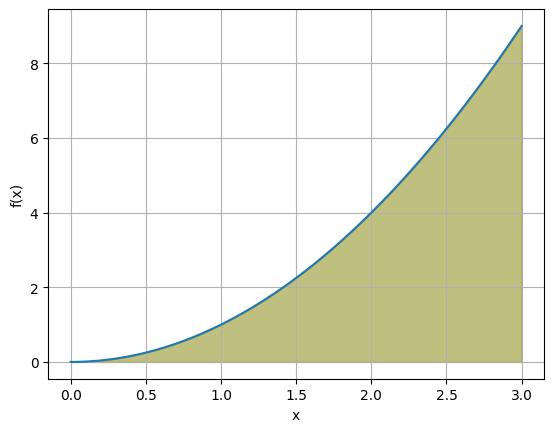

Valor de la integral con n = 6 segmentos es 8.9375


In [ ]:
# Función y limites
f = lambda x: x**2
a = 0
b = 3


# Grafica
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, color = 'olive', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


# Número de intervalos
n = 6

Integral = Cuadratura_Simple(f, a, b, n)
print(f'Valor de la integral con n = {n} segmentos es {Integral}')

## 2. Regla del Trapecio


La regla del trapecio es el método de Newton-Cotes más simple, que aproxima la función mediante una línea recta entre los puntos extremos del intervalo.

Para el intervalo [a,b]:

$$\int_a^b f(x)dx \approx \frac{b-a}{2} \cdot [f(a) + f(b)]$$





## Método del Trapecio compuesta
   En lugar de usar rectángulos, se aproxima el área bajo la curva usando trapecios, lo cual da una mejor aproximación en algunos casos.


La **fórmula del método del trapecio** para aproximar una integral definida en el intervalo $[a, b]$ divide el área bajo la curva en una serie de trapecios, en lugar de rectángulos. Esta fórmula se expresa como:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right] -\frac{h^3}{12}f''(\xi)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- $x_i = a + i \cdot h$ son los puntos intermedios donde se evalúa la función, con $i = 1, 2, \ldots, n-1$.

In [ ]:
def Trapecio_Compuesta(f, a, b, n):
    """
    Cuadratura compuesta del trapecio para aproximar la integral de f en [a, b] con n puntos.
    Entrada:
    f : función a integrar
    a : límite inferior de integración
    b : límite superior de integración
    n : número de subintervalos (debe ser un entero positivo)
    Salida:
    integral : valor aproximado de la integral de f en [a, b]
    """
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral
    integral = 0.5 * (f(a) + f(b)) # extremos
    # Calcular la integral usando la regla del trapecio
    for i in range(1, n):
        x_i = a + i * h # punto del subintervalo
        integral += f(x_i) # valor de la función en el punto del subintervalo
    return integral * h

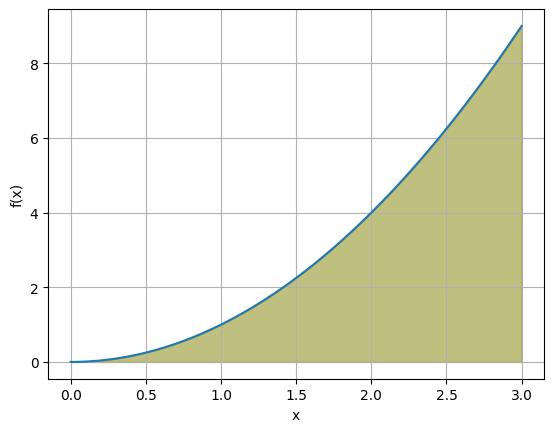

Valor de la integral con n = 6 segmentos es 9.125


In [ ]:
# Función y limites
f = lambda x: x**2
a = 0
b = 3


# Grafica
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, color = 'olive', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


# Número de intervalos
n = 6

Integral = Trapecio_Compuesta(f, a, b, n)
print(f'Valor de la integral con n = {n} segmentos es {Integral}')

## 3. Regla de Simpson 1/3


La regla de Simpson 1/3 utiliza polinomios cuadráticos (grado 2) para aproximar la función, requiriendo tres puntos de evaluación.


Para el intervalo [a,b] con punto medio $c = \frac{a+b}{2}$:

$$\int_a^b f(x)dx \approx \frac{b-a}{6} \cdot [f(a) + 4f(c) + f(b)]$$



## Regla de Simpson Compuesta (1/3)
Aplica la regla de Simpson 1/3 a múltiples subintervalos, requiriendo un número par de subintervalos ($n$ par).

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4 \sum_{\text{impares}} f(x_i) + 2 \sum_{\text{pares}} f(x_i) + f(b) \right] -\frac{h^5}{90}f^{(4)}(\xi)
$$

donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo, y $n$ debe ser par.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- La suma de los términos **impares** es sobre los valores de $i = 1, 3, 5, \ldots, n-1$.
- La suma de los términos **pares** es sobre los valores de $i = 2, 4, 6, \ldots, n-2$.


In [ ]:
def Simpson13_Compuesta(f, a, b, n):
    """
    Cuadratura compuesta de Simpson 1/3 para aproximar la integral de f en [a, b] con n puntos.
    Entrada:
    f : función a integrar
    a : límite inferior de integración
    b : límite superior de integración
    n : número de subintervalos (debe ser un entero positivo y par)
    Salida:
    integral : valor aproximado de la integral de f en [a, b]
    """
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if n % 2 == 1:
        raise ValueError("n debe ser un número par para Simpson 1/3")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral
    integral = f(a) + f(b) # extremos
    integral_pares = 0
    integral_impares = 0
    # Valores
    for i in range(1, n):
      # Calcular el punto del subintervalo
      x_i = a + i * h
      if i % 2 == 0:
        integral_pares += f(x_i)
      else:
        integral_impares += f(x_i)

    integral += 4 * integral_impares + 2 * integral_pares # valor de la función en el punto medio
    return integral * h / 3



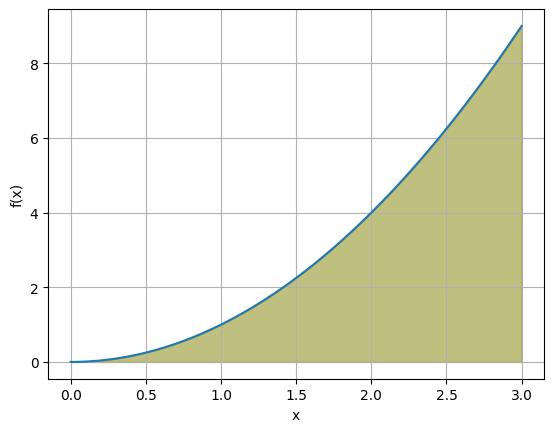

Valor de la integral con n = 8 segmentos es 9.0


In [ ]:
# Función y limites
f = lambda x: x**2
a = 0
b = 3


# Grafica
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, color = 'olive', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


# Número de intervalos
n = 8

Integral = Simpson13_Compuesta(f, a, b, n)
print(f'Valor de la integral con n = {n} segmentos es {Integral}')

### Método de Simpson 3/8

La regla de Simpson 3/8 utiliza polinomios cúbicos (grado 3) y requiere cuatro puntos de evaluación igualmente espaciados.

$$
\int_a^b f(x) \, dx \approx \frac{3h}{8} \left[ f(a) + 3 \sum_{\text{no múltiplos de 3}} f(x_i) + 2 \sum_{\text{múltiplos de 3}} f(x_i) + f(b) \right]
$$


donde:

- $h = \frac{b - a}{n}$ es el ancho de cada subintervalo, y $n$ debe ser múltiplo de 3.
- $f(a)$ y $f(b)$ son los valores de la función en los extremos del intervalo.
- La suma de los términos con coeficiente 3 es sobre los valores de $f(x_i)$ donde $i$ no es múltiplo de 3.
- La suma de los términos con coeficiente 2 es sobre los valores de $f(x_i)$ donde $i$ es múltiplo de 3, excluyendo $a$ y $b$.

Su error es:

$$E = -\frac{3h^5}{80} \cdot f^{(4)}(\xi)$$

In [ ]:
def Simpson38_Compuesta(f, a, b, n):
    """
    Cuadratura compuesta de Simpson 3/8 para aproximar la integral de f en [a, b] con n puntos.
    Entrada:
    f : función a integrar
    a : límite inferior de integración
    b : límite superior de integración
    n : número de subintervalos (debe ser un entero positivo y múltiplo de 3)
    Salida:
    integral : valor aproximado de la integral de f en [a, b]
    """
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if n % 3 != 0:
        raise ValueError("n debe ser un múltiplo de 3 para Simpson 3/8")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral en extremos y puntos intermedios
    integral = (3 * h / 8) * (f(a) + f(b))
    integral_3 = 0
    integral_no3 = 0

    for i in range(1, n):
        # Calcular el punto del subintervalo
        x_i = a + i * h
        # Si el índice es múltiplo de 3, aplicar coeficiente 2, de lo contrario aplicar coeficiente 3
        if i % 3 == 0:
            # Coeficiente 3 para los puntos que son múltiplos de 3
            integral_3 += 2 * f(x_i)
        else:
            # Coeficiente 3 para los puntos que no son múltiplos de 3
            integral_no3 += 3 * f(x_i)

    # Multiplicar por el factor de Simpson 3/8
    integral += (3 * h / 8) * (integral_3 + integral_no3)

    return integral

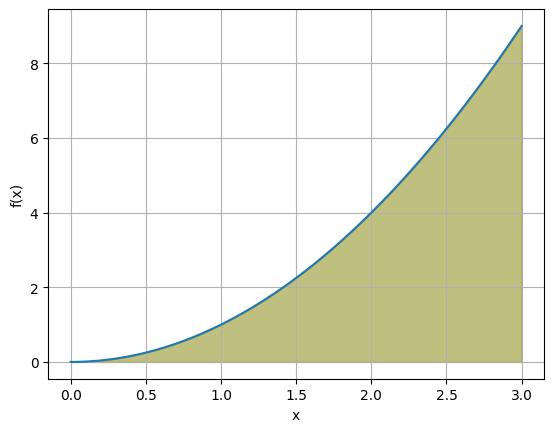

Valor de la integral con n = 3 segmentos es 9.0


In [ ]:
# Función y limites
f = lambda x: x**2
a = 0
b = 3


# Grafica
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, color = 'olive', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


# Número de intervalos
n = 3

Integral = Simpson38_Compuesta(f, a, b, n)
print(f'Valor de la integral con n = {n} segmentos es {Integral}')

# Animación

[Visualización](https://integral-simpson-trapz-medio.streamlit.app/)

# Integración usando `scipy.integrate`

La integración numérica es útil cuando necesitamos calcular el área bajo una curva o resolver una integral definida, pero no tenemos una solución analítica o cuando estamos trabajando con datos discretos en lugar de una función continua. Scipy tiene algunos métodos númericos que nos pueden ayudar [ver documentación](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [ ]:
from scipy.integrate import trapezoid # Método trapezoidal
from scipy.integrate import simpson # Método Simpson


In [ ]:
a,b  = 0, 3
f = lambda x: x**2
n =8
x = np.linspace(a, b, n)

integral_trapezoidal = trapezoid(f(x), x)
integral_simpson = simpson(f(x), x=x)

print("Integral Trapezoidal:", integral_trapezoidal)
print("Integral Simpson:", integral_simpson)


Integral Trapezoidal: 9.091836734693878
Integral Simpson: 9.0


# Solución *exacta*

En ocasiones podemos obtener la solución simbólica exacta usando `sympy`

In [ ]:
from sympy import integrate, symbols, sin, exp

In [ ]:
t = symbols('t')
f = t**2
integrate(f, (t, 0, 3))

9

Veamos el tiempo de cálculo

In [ ]:
import time
from sympy import symbols, integrate
from scipy.integrate import trapezoid  # Método trapezoidal
from scipy.integrate import simpson  # Método Simpson

a,b = 0, 3
# Define funciones numéricas y simbólicas
f = lambda x: x**2  # Función numérica
x_sym = symbols('x')
f_sym = x_sym**2    # Función simbólica

# Medir tiempo de métodos numéricos
start_time = time.time()
integral_trapezoidal = trapezoid(f(x), x)
tiempo_trapezoidal = time.time() - start_time

start_time = time.time()
integral_simpson = simpson(f(x), x)
tiempo_simpson = time.time() - start_time

# Medir tiempo del método simbólico
start_time = time.time()
integral_simbolica = float(integrate(f_sym, (x_sym, a, b)))
tiempo_simbolico = time.time() - start_time

print(f"Tiempo Trapezoidal: {tiempo_trapezoidal:.6f} segundos")
print(f"Tiempo Simpson: {tiempo_simpson:.6f} segundos")
print(f"Tiempo simbólico: {tiempo_simbolico:.6f} segundos")


Tiempo Trapezoidal: 0.000538 segundos
Tiempo Simpson: 0.000531 segundos
Tiempo simbólico: 0.032086 segundos
